#                         Tanzania Mobile Money
<img src='mpesa.jpg' alt='mpesa logo'>

Mobile money seems to be very popular in East Africa. Billions of dollars are transacted each year through mobile money services like Mpesa. People pay for good and services as well as their utility bills with it.

In this project I will analyse the demographics of over 7000 mobile money users in Tanzania and dig in for insights.

# 1. Examine the dataset. Are there any missing observations or columns where the data do not seem valid?

In [1]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys
!{sys.executable} -m pip install folium --user
import folium
from folium.plugins import MarkerCluster

In [2]:
df_mobile= pd.read_csv('training.csv')

In [3]:
df_mobile = df_mobile.rename({'Q1': 'age', 'Q2': 'gender', 'Q3':'marital_status', 'Q4':'highest_education', 'Q5':'land_ownership', 'Q6':'title_deed', 'Q7':'own_phone', 'Q8_1':'salaries_wages', 'Q8_2':'selling_produce', 'Q8_3':'selling_services', 'Q8_4':'piece_job', 'Q8_5':'rental_income', 'Q8_6':'interest_earned','Q8_7':'pension', 'Q8_8':'social_grant', 'Q8_9':'pocket_money', 'Q8_10':'someone_pays', 'Q8_11':'other', 'Q9':'employer_for_employed', 'Q10':'what_you_sell', 'Q11':'service_you_provide', 'Q12':'sent_money_in_12_months', 'Q13':'when_last_send_money','Q14':'recieved_money_in_12_months','Q15':'when_last_recieve_money','Q16':'how_often_purchase_mobilemoney','Q17':'how_often_pay_bills_with_mm','Q18':'literacy_Kiswhahili','Q19':'literacy_english'}, axis='columns')
df_mobile.columns

Index(['ID', 'age', 'gender', 'marital_status', 'highest_education',
       'land_ownership', 'title_deed', 'own_phone', 'salaries_wages',
       'selling_produce', 'selling_services', 'piece_job', 'rental_income',
       'interest_earned', 'pension', 'social_grant', 'pocket_money',
       'someone_pays', 'other', 'employer_for_employed', 'what_you_sell',
       'service_you_provide', 'sent_money_in_12_months',
       'when_last_send_money', 'recieved_money_in_12_months',
       'when_last_recieve_money', 'how_often_purchase_mobilemoney',
       'how_often_pay_bills_with_mm', 'literacy_Kiswhahili',
       'literacy_english', 'Latitude', 'Longitude', 'mobile_money', 'savings',
       'borrowing', 'insurance', 'mobile_money_classification'],
      dtype='object')

In [4]:
df_income= df_mobile[['ID','age','gender', 'marital_status', 'title_deed', 
                      'how_often_purchase_mobilemoney','how_often_pay_bills_with_mm','salaries_wages',
                      'selling_produce', 'selling_services',
       'piece_job', 'rental_income', 'interest_earned', 'pension',
       'social_grant', 'pocket_money', 'someone_pays', 'other', 'mobile_money', 'Latitude', 'Longitude']]

In [5]:
df_income.shape

(7094, 21)

Validate the data

In [6]:
def check_range(num, lower, upper):
    if num >= lower and num<= upper:
        return True
    else:
        
        raise ValueError('number is out of range.')
    
def check_int(num):
    try:
        int(num)
    except:
        raise ValueError(f'{num} is not an integer.')

In [7]:

#check age
for each in df_mobile.age:
    check_int(each)

#check gender
for each in df_mobile.gender:
    check_int(each)
    check_range(each,1, 2)
    

#check marital status
for each in df_mobile.marital_status:
    check_int(each)
    check_range(each, 1, 4)

#check education level
for each in df_mobile.highest_education:
    try:
        check_int(each)
    except:
        print(f'{each} is not an integer')
    try:
        check_range(each, 1, 7)
    except:
        print('Removing:')
        print(df_mobile[df_mobile.highest_education==each].index)
        df_mobile=df_mobile[df_mobile.highest_education!= each]
        print(f'{each} is not in range. It has been removed')
        
    
#check land ownership
for each in df_mobile.land_ownership:
    check_int(each)
    check_range(each, 1, 6)

#check title deed
for each in df_mobile.title_deed:
    check_int(each)
    check_range(each, 1, 2)

    
#check mobile phone
for each in df_mobile.own_phone:
    check_int(each)
    check_range(each, 1, 2)

#check salaries/wages
for each in df_mobile.salaries_wages:
    check_int(each)
    check_range(each, 0, 1)
    
#check if selling produce
for each in df_mobile.selling_produce:
    check_int(each)
    check_range(each, 0, 1)
    
#check selling services
for each in df_mobile.selling_services:
    check_int(each)
    check_range(each, 0, 1)

#check piece job
for each in df_mobile.piece_job:
    check_int(each)
    check_range(each, 0, 1)
    
#check rental income
for each in df_mobile.rental_income:
    check_int(each)
    check_range(each, 0, 1)
    
#check if earns interest
for each in df_mobile.interest_earned:
    check_int(each)
    check_range(each, 0, 1)

#check if pension
for each in df_mobile.pension:
    check_int(each)
    check_range(each, 0, 1)
    
#social grant
for each in df_mobile.social_grant:
    check_int(each)
    check_range(each, 0, 1)

#pocket money
for each in df_mobile.pocket_money:
    check_int(each)
    check_range(each, 0, 1)
    
#someonepays
for each in df_mobile.someone_pays:
    check_int(each)
    check_range(each, 0, 1)
#other
for each in df_mobile.other:
    check_int(each)
    check_range(each, 0, 1)
    
#employer if employed. -1 means not applicable
for each in df_mobile.employer_for_employed:
    check_int(each)
    if each!=0:
        check_range(each, -1, 7)
    else:
        print('found 0. out of bound')
        
#what you sell
for each in df_mobile.what_you_sell:
    check_int(each)
    check_range(each, -1, 10)
    
#services you sell
for each in df_mobile.service_you_provide:
    if each!= 0:
        check_int(each)
    else:
        print('0 is our of range')
    check_range(each, -1, 12)
    
#sent money last 12 months
for each in df_mobile.sent_money_in_12_months:
    check_int(each)
    check_range(each, 1, 2)

#when last did you send money
for each in df_mobile.when_last_send_money:
    check_int(each)
    check_range(each, -1, 6)
    
#if recieved money is 12 months
for each in df_mobile.recieved_money_in_12_months:
    check_int(each)
    check_range(each, 1, 2)
    
#recieved money is last 12 months
for each in df_mobile.when_last_recieve_money:
    check_int(each)
    check_range(each, -1, 6)

# when last purchase mobile money
for each in df_mobile.how_often_purchase_mobilemoney:
    check_int(each)
    check_range(each, -1, 5)
    
#how often pay in mm'
for each in df_mobile.how_often_pay_bills_with_mm:
    check_int(each)
    check_range(each, -1, 5)
    
#literacy in kiswahili
for each in df_mobile.literacy_Kiswhahili :
    check_int(each)
    check_range(each, 1, 5)

#literacy in English
for each in df_mobile.literacy_english: 
    check_int(each)
    check_range(each, 1, 5)

#latitude
for each in df_mobile.Latitude:
    try:
        float(each)
    except:
        raise TypeError('Latitude must be a float')

#longtitude
for each in df_mobile.Longitude:
    try:
        float(each)
    except:
        raise TypeError('Longitude must be a float')
        
#use mobile money
for each in df_mobile.mobile_money:
    check_int(each)
    check_range(each, 0, 1)
    
#savings
for each in df_mobile.savings:
    check_int(each)
    check_range(each, 0, 1)
    
#check borrowing
for each in df_mobile.borrowing:
    check_int(each)
    check_range(each, 0, 1)

#check insurance
for each in df_mobile.insurance:
    check_int(each)
    check_range(each, 0, 1)
    
#check mobile money classification
for each in df_mobile.mobile_money_classification:
    check_int(each)
    check_range(each, 0, 3)


Removing:
Int64Index([1053, 2486], dtype='int64')
8 is not in range. It has been removed
Removing:
Int64Index([], dtype='int64')
8 is not in range. It has been removed


In [8]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7092 entries, 0 to 7093
Data columns (total 37 columns):
ID                                7092 non-null int64
age                               7092 non-null int64
gender                            7092 non-null int64
marital_status                    7092 non-null int64
highest_education                 7092 non-null int64
land_ownership                    7092 non-null int64
title_deed                        7092 non-null int64
own_phone                         7092 non-null int64
salaries_wages                    7092 non-null int64
selling_produce                   7092 non-null int64
selling_services                  7092 non-null int64
piece_job                         7092 non-null int64
rental_income                     7092 non-null int64
interest_earned                   7092 non-null int64
pension                           7092 non-null int64
social_grant                      7092 non-null int64
pocket_money                 

In [9]:
number_to_word= {
    1: 'male',
    2:'female'
}
df_mobile.gender=df_mobile.gender.map(number_to_word)
df_mobile.head()

,ID,age,gender,marital_status,highest_education,land_ownership,title_deed,own_phone,salaries_wages,selling_produce,...,how_often_pay_bills_with_mm,literacy_Kiswhahili,literacy_english,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,female,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,male,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,female,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,male,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,male,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


# 2. Get basic descriptive statistics for the dataset.

In [10]:
df_mobile.describe()

,ID,age,marital_status,highest_education,land_ownership,title_deed,own_phone,salaries_wages,selling_produce,selling_services,...,how_often_pay_bills_with_mm,literacy_Kiswhahili,literacy_english,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,...,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000
mean,4743.376481,38.230541,1.787366,3.058658,2.549351,1.840525,1.398054,0.062183,0.630288,0.058094,...,-0.432036,1.860406,3.163988,-6.035482,35.354899,0.553864,0.461506,0.433023,0.151156,1.799069
std,2731.032142,16.325729,1.165198,1.555788,1.534253,0.366145,0.489531,0.241504,0.482761,0.233937,...,1.489977,1.351485,1.317376,2.720469,2.899436,0.497125,0.498551,0.495529,0.358226,1.197037
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.750000,25.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.279598,32.935719,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4747.000000,35.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,...,-1.000000,1.000000,4.000000,-6.088322,35.073388,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7106.250000,48.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,0.000000,...,-1.000000,4.000000,4.000000,-3.517604,38.352004,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,4.000000,7.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


# 3. Create appropriate graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

In [11]:
have_mm= df_mobile[df_mobile.mobile_money==1]
no_mm= df_mobile[df_mobile.mobile_money==0]


### financial service accessed vs gender

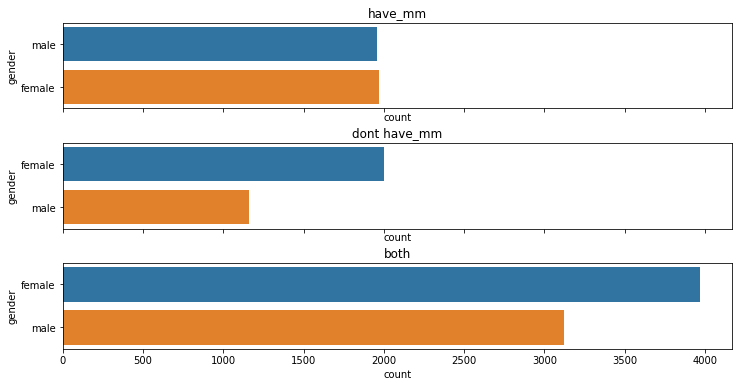

In [12]:
fig, axes= plt.subplots(3, 1, figsize=[12, 6], sharex= True)

sns.countplot(y='gender' , data=have_mm, ax= axes[0]).set_title('have_mm')
sns.countplot(y='gender' , data=no_mm, ax= axes[1]).set_title('dont have_mm')
sns.countplot(y='gender' , data=df_mobile, ax= axes[2]).set_title('both')
plt.subplots_adjust(hspace = 0.4 )
#sns.catplot(y='gender',kind='count', data=df_mobile[df_mobile.mobile_money==1],  ax= axes[1]).set(xlabel='Gender without phone')
#sns.catplot(y='gender',kind='count', data=df_mobile[df_mobile.mobile_money==2],  ax= axes[2]).set(xlabel='Gender with phone')

### financial service accessed vs age

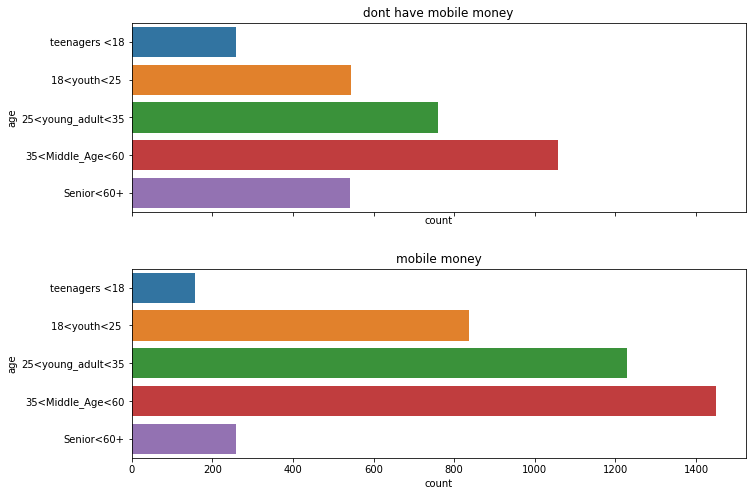

In [13]:
fig, axes= plt.subplots(2, 1, figsize=[11, 8], sharex= True)

bins= [12, 18, 25, 35, 60, 100]
group_names= ['teenagers <18', '18<youth<25 ', '25<young_adult<35', '35<Middle_Age<60', 'Senior<60+']

cats_no= pd.cut(no_mm.age, bins, labels= group_names)
sns.countplot(y=cats_no, ax= axes[0]).set_title('dont have mobile money')

cats_only= pd.cut(have_mm.age, bins, labels= group_names)
sns.countplot(y=cats_only, ax= axes[1]).set_title('mobile money')

plt.subplots_adjust(wspace = 0.8 )
plt.subplots_adjust(hspace = 0.3 )

### Financial services vs Marital status


In [14]:
df_income_id= df_income.ID.drop_duplicates()

In [15]:
number_to_word={
    1: 'married',
    2: 'divorced',
    3: 'widowed',
    4: 'single'
    
}

df_income['marital_status']= df_income['marital_status'].map(number_to_word)
#df_income_id= df_income.ID.drop_duplicates()


### financial vs land ownership

In [16]:
number_to_word= {
    1: 'land_owner',
    2:'not_land_owner'
}
df_income.title_deed= df_mobile.title_deed.map(number_to_word)

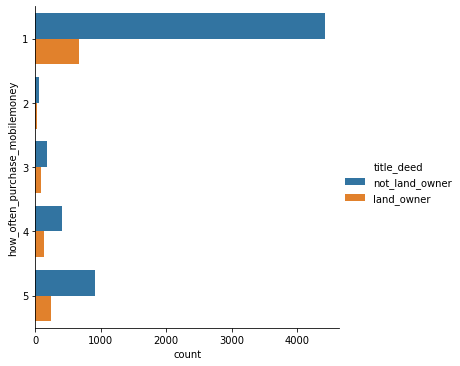

In [17]:

sns.catplot(hue='title_deed', y='how_often_purchase_mobilemoney', data=df_income, kind='count')

### financial services accessed vs income type

In [18]:
'''
df_income= df_mobile[['ID','age','gender', 'marital_status', 'title_deed', 'how_often_purchase_mobilemoney','salaries_wages', 'selling_produce', 'selling_services',
       'piece_job', 'rental_income', 'interest_earned', 'pension',
       'social_grant', 'pocket_money', 'someone_pays', 'other', 'mobile_money', 'Latitude', 'Longitude']]
'''
df_income= pd.melt(df_income, id_vars=['ID','age','gender','marital_status', 'title_deed','Latitude', 'Longitude','mobile_money', 'how_often_purchase_mobilemoney', 'how_often_pay_bills_with_mm'], var_name= 'income_type', value_name='income_value')
df_income.head()

,ID,age,gender,marital_status,title_deed,Latitude,Longitude,mobile_money,how_often_purchase_mobilemoney,how_often_pay_bills_with_mm,income_type,income_value
0,5086,98,2,widowed,not_land_owner,-4.460442,29.811396,0,1,-1,salaries_wages,0
1,1258,40,1,married,land_owner,-6.176438,39.244871,1,4,4,salaries_wages,1
2,331,18,2,single,not_land_owner,-6.825702,37.652798,1,1,-1,salaries_wages,0
3,6729,50,1,married,land_owner,-3.372049,35.808307,1,4,-1,salaries_wages,0
4,8671,34,1,married,not_land_owner,-7.179645,31.039095,1,1,-1,salaries_wages,0


In [19]:
bool_to_word= {
    1:'yes',
    0:'no'
}
df_income['income_value']= df_income.income_value.map(bool_to_word)

In [20]:
mobile_to_word= {
    1:'yes',
    0:'no'
}
df_income['mobile_money']= df_income.mobile_money.map(bool_to_word)

In [21]:
df_income.head()

,ID,age,gender,marital_status,title_deed,Latitude,Longitude,mobile_money,how_often_purchase_mobilemoney,how_often_pay_bills_with_mm,income_type,income_value
0,5086,98,2,widowed,not_land_owner,-4.460442,29.811396,no,1,-1,salaries_wages,no
1,1258,40,1,married,land_owner,-6.176438,39.244871,yes,4,4,salaries_wages,yes
2,331,18,2,single,not_land_owner,-6.825702,37.652798,yes,1,-1,salaries_wages,no
3,6729,50,1,married,land_owner,-3.372049,35.808307,yes,4,-1,salaries_wages,no
4,8671,34,1,married,not_land_owner,-7.179645,31.039095,yes,1,-1,salaries_wages,no


In [22]:
df_income_all= df_income[df_income.income_value=='yes']
df_income_no= df_income_all[df_income_all.mobile_money==0]
df_income_mm= df_income_all[df_income_all.mobile_money==1]
#df_income_mm=df_income[(df_income.income_value=='yes')& (df_income.mobile_money==1)]

In [23]:
df_income_mm.shape

(0, 12)

In [24]:
df_income_all.income_type.value_counts()

selling_produce     4470
piece_job           2393
pocket_money        1112
salaries_wages       441
selling_services     412
someone_pays         410
social_grant         131
rental_income         67
pension               34
interest_earned       34
other                  9
Name: income_type, dtype: int64

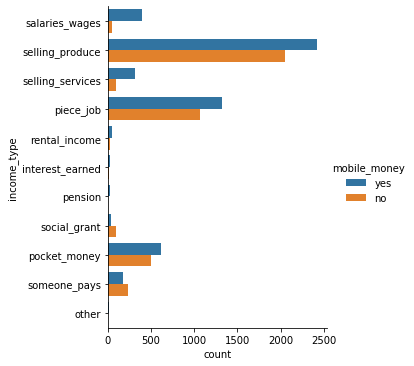

In [25]:
sns.catplot(hue='mobile_money', y='income_type', data=df_income_all, kind='count')

# 4. Create appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.

### Frequency vs gender

In [26]:
number_to_word= {
    -1: 'NA',
    1: 'Never',
    2: 'Daily',
    3: 'Weekly',
    4: 'Monthly',
    5: 'Less than monthly'
}
df_mobile['how_often_purchase_mobilemoney']= df_income['how_often_purchase_mobilemoney'].map(number_to_word)

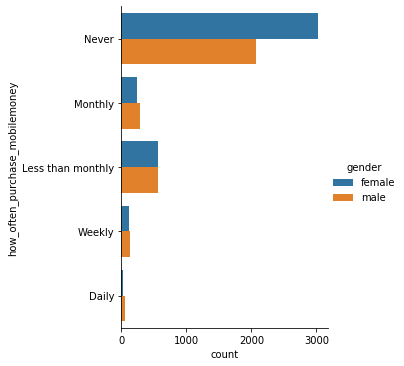

In [27]:
sns.catplot(hue='gender', y='how_often_purchase_mobilemoney', data=df_mobile, kind='count')
plt.show()

### frequency vs age

In [28]:
def to_age_group(age):
    if age<=18:
        return 'teenager'
    elif age >18 and age<=25:
        return 'youth'
    elif age>25 and age<=35:
        return 'young adult'
    elif age >35 and age<=60:
        return 'midddle age'
    else:
        return 'senior'

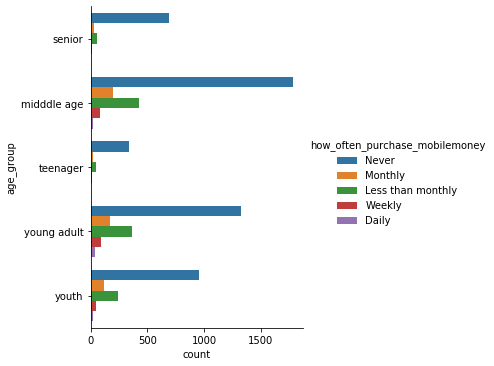

In [29]:
#df_freq_age= df_mobile[['age', 'how_often_purchase_mobilemoney']]
df_mobile['age_group']= df_mobile.age.apply(to_age_group)
#sns.swarmplot(x='age', y='how_often_purchase_mobilemoney', data=df_freq_age)
#group_names= 'teenagers <18', '18<youth<25 ', '25<young_adult<35', '35<Middle_Age<60', 'Senior<60+'
sns.catplot(hue='how_often_purchase_mobilemoney', y='age_group', data=df_mobile, kind='count')

### frquency vs marital status

In [30]:
number_to_word={
    1: 'married',
    2: 'divorced',
    3: 'widowed',
    4: 'single'
    
}
df_mobile['marital_status']= df_mobile['marital_status'].map(number_to_word)

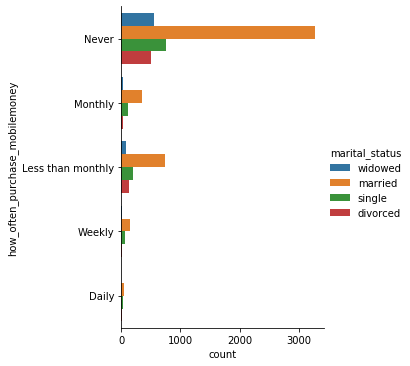

In [31]:
sns.catplot(hue='marital_status', y='how_often_purchase_mobilemoney', data=df_mobile, kind='count')

### frequency vs land

In [32]:
number_to_word= {
    1: 'land_owner',
    2:'not_land_owner'
}
df_mobile.title_deed= df_mobile.title_deed.map(number_to_word)

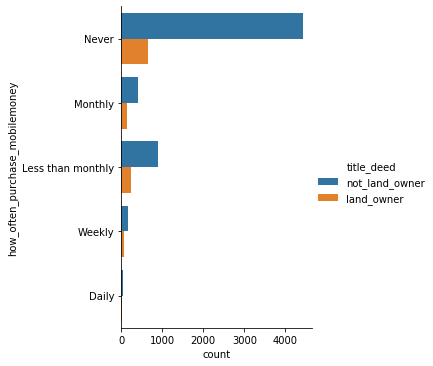

In [33]:

sns.catplot(hue='title_deed', y='how_often_purchase_mobilemoney', data=df_mobile, kind='count')

### frequeny vs income type

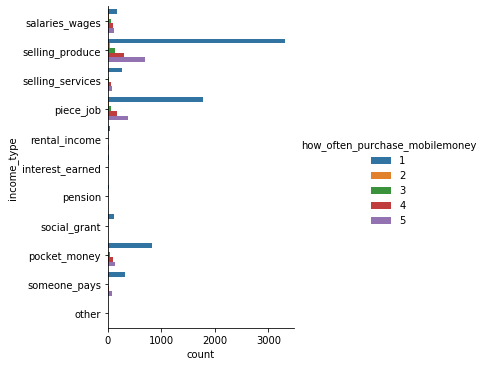

In [34]:
sns.catplot(hue='how_often_purchase_mobilemoney', y='income_type', data=df_income_all, kind='count')

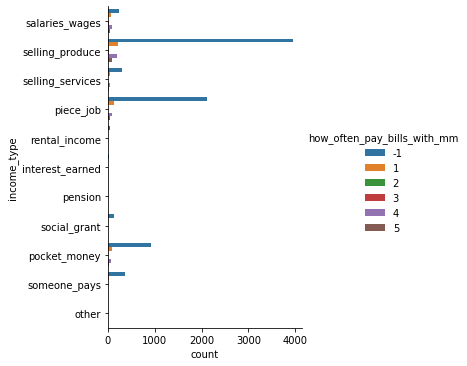

In [35]:
sns.catplot(hue='how_often_pay_bills_with_mm', y='income_type', data=df_income_all, kind='count')


In [36]:
df_income_all.how_often_pay_bills_with_mm.value_counts()

-1    8102
 1     597
 4     488
 5     225
 3      75
 2      26
Name: how_often_pay_bills_with_mm, dtype: int64

In [37]:
df_income_all.income_type.unique()


array(['salaries_wages', 'selling_produce', 'selling_services',
       'piece_job', 'rental_income', 'interest_earned', 'pension',
       'social_grant', 'pocket_money', 'someone_pays', 'other'],
      dtype=object)

In [38]:
df_income_all.head()

,ID,age,gender,marital_status,title_deed,Latitude,Longitude,mobile_money,how_often_purchase_mobilemoney,how_often_pay_bills_with_mm,income_type,income_value
1,1258,40,1,married,land_owner,-6.176438,39.244871,yes,4,4,salaries_wages,yes
27,5036,26,2,divorced,not_land_owner,-1.324064,31.790627,yes,1,-1,salaries_wages,yes
45,1549,20,2,divorced,not_land_owner,-2.545407,32.958316,yes,5,-1,salaries_wages,yes
47,8467,35,1,married,not_land_owner,-8.564092,35.339058,yes,4,4,salaries_wages,yes
62,229,34,1,married,land_owner,-6.968397,39.086816,yes,4,2,salaries_wages,yes


# 5. Create a map to visually explore geographic distribution of mobile services coverage with respect to type of income.

In [44]:
df_income_top1= df_income_mm[df_income_mm.income_type=='selling_produce']
#| (df_income_new.income_type=='piece_job')

df_income_top1= df_income_top1.head(10)
df_income_all.head()


,ID,age,gender,marital_status,title_deed,Latitude,Longitude,mobile_money,how_often_purchase_mobilemoney,how_often_pay_bills_with_mm,income_type,income_value
1,1258,40,1,married,land_owner,-6.176438,39.244871,yes,4,4,salaries_wages,yes
27,5036,26,2,divorced,not_land_owner,-1.324064,31.790627,yes,1,-1,salaries_wages,yes
45,1549,20,2,divorced,not_land_owner,-2.545407,32.958316,yes,5,-1,salaries_wages,yes
47,8467,35,1,married,not_land_owner,-8.564092,35.339058,yes,4,4,salaries_wages,yes
62,229,34,1,married,land_owner,-6.968397,39.086816,yes,4,2,salaries_wages,yes


In [50]:
m= folium.Map(location=[-6.161184, 35.745426], tiles='OpenStreetMap', zoom_start=6)

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(df_income_all.Latitude, df_income_all.Longitude):
    #print(f'{lat}: {long}')
    folium.Marker(location = [lat, long]).add_to(marker_cluster)

m


# 6. What can you conclude about use of financial services in Tanzania? Which demographic and geographic factors are associated with mobile money use?